In [1]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make sure you pass the root dir while launching the notebook, i.e.:
# env PYTHONPATH=`pwd` jupyter notebook
from data import load_dataset

%matplotlib inline

In [2]:
df = load_dataset("interim")

print("---> Shape:", df.shape)
df.head()

---> Shape: (99976, 42)


,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,1,1,1,1,0.0,0.0,0.0,178839.0,9.653333,0.0
1,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,1,1,2,2,0.0,0.0,0.0,49014.0,13.181389,NaN
2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1,1,2,2,0.0,0.0,0.0,124839.0,11.561944,0.0
3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0.0,0.0,0.0,324676.0,15.751111,0.0
4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,0.0,0.0,0.0,7100.0,12.698611,NaN


In [3]:
numeric_feats = df.select_dtypes(include=np.number).drop("default", axis=1).columns
print(f"---> Number of numeric features: {numeric_feats.size}")

missing = df.default.isnull()
df = df.loc[~missing]
print(f"---> Dropped {missing.sum():,} missing `default` rows")

---> Number of numeric features: 41
---> Dropped 10,000 missing `default` rows


In [4]:
df.corr("spearman").default.sort_values(ascending=False)

default                                1.000000
account_worst_status_0_3m              0.143701
account_worst_status_12_24m            0.131797
account_worst_status_6_12m             0.131500
account_worst_status_3_6m              0.130887
account_status                         0.115743
num_arch_dc_0_12m                      0.100390
num_arch_dc_12_24m                     0.093183
account_days_in_term_12_24m            0.091787
avg_payment_span_0_12m                 0.091496
account_days_in_rem_12_24m             0.083643
account_days_in_dc_12_24m              0.079499
worst_status_active_inv                0.067285
account_incoming_debt_vs_paid_0_24m    0.061868
num_active_div_by_paid_inv_0_12m       0.056267
num_unpaid_bills                       0.055985
recovery_debt                          0.047666
avg_payment_span_0_3m                  0.041884
sum_capital_paid_account_0_12m         0.033225
merchant_category                      0.030649
num_active_inv                         0

In [5]:
# Custom `cmap` for better visibility
cmap = colors.ListedColormap(['yellow', 'red'])
norm = colors.BoundaryNorm([0, 0.5, 1], cmap.N)

In [6]:
# Break features into sub-groups
categories = ["account", "num", "status"]
groups = dict.fromkeys(categories)
seen = []
for category in categories:
    features = df.filter(regex=f"^{category}", axis=1).columns
    groups[category] = features
    seen.extend(features)

groups["others"] = [i for i in numeric_feats if i not in seen]

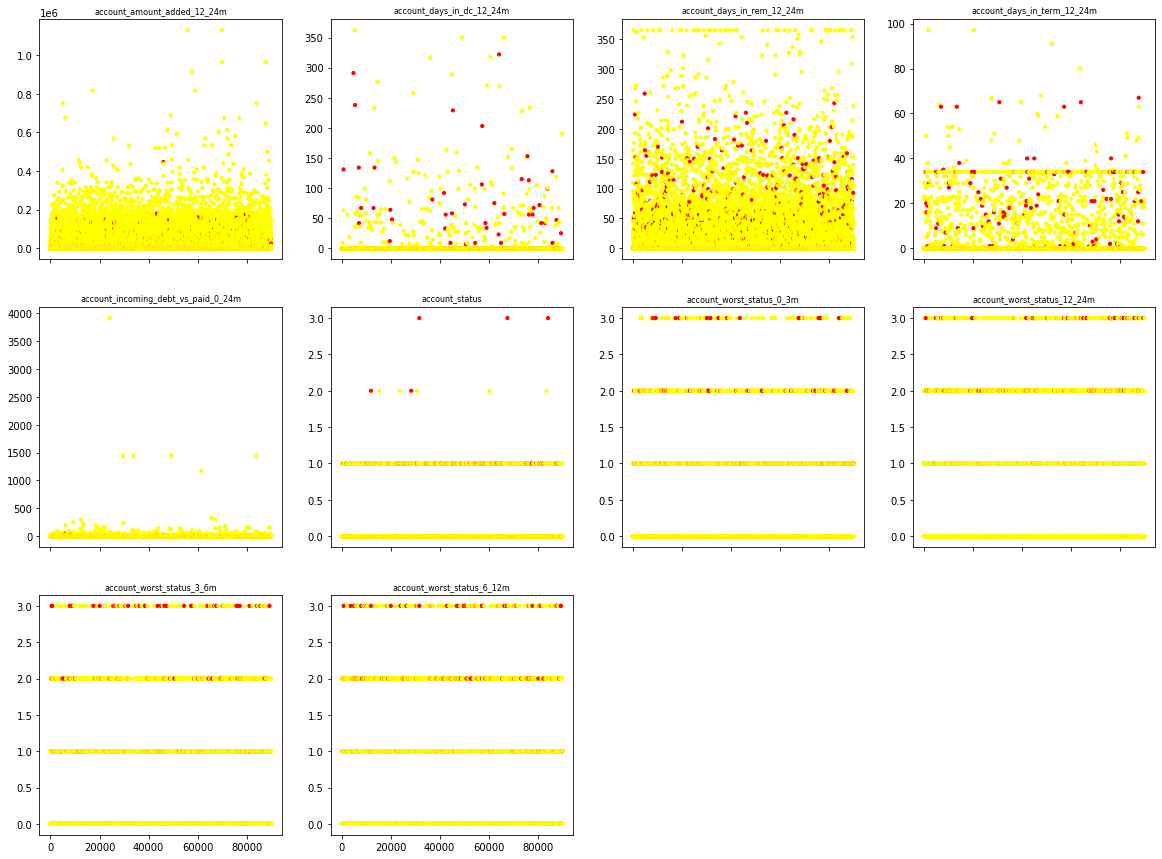

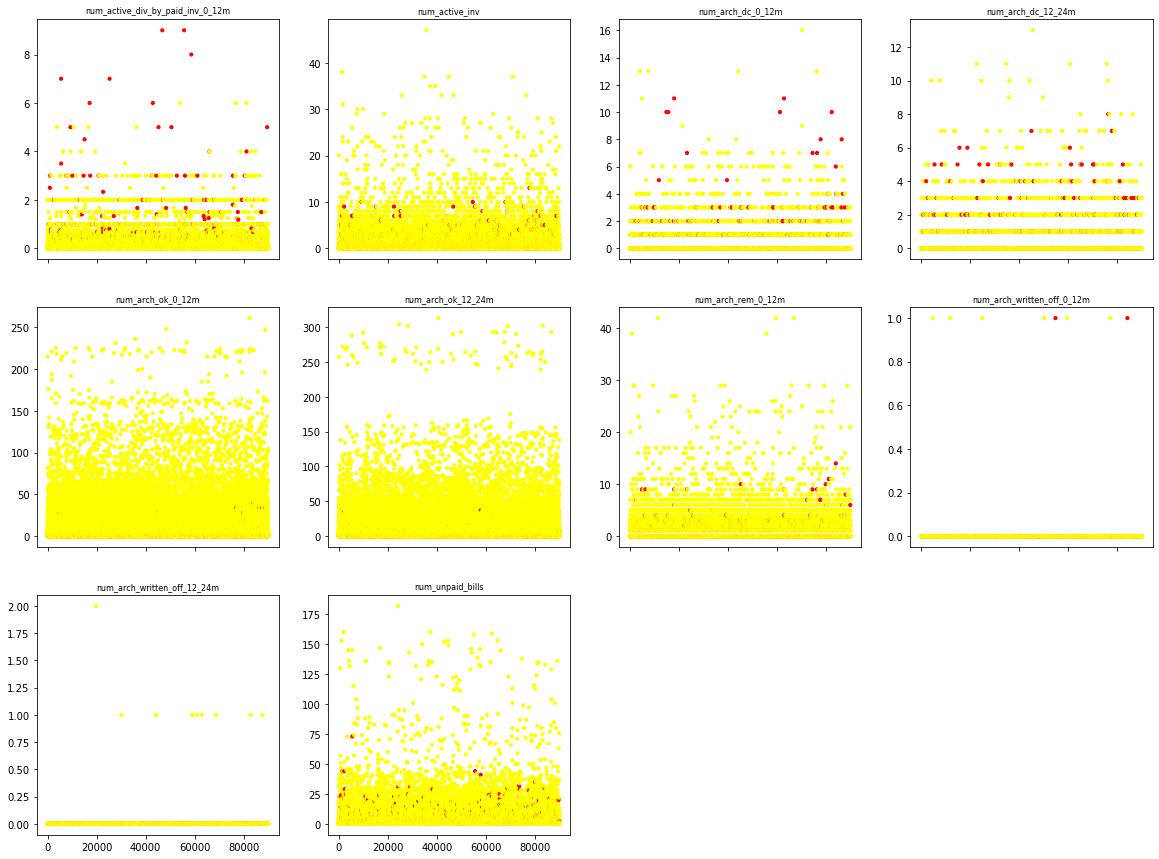

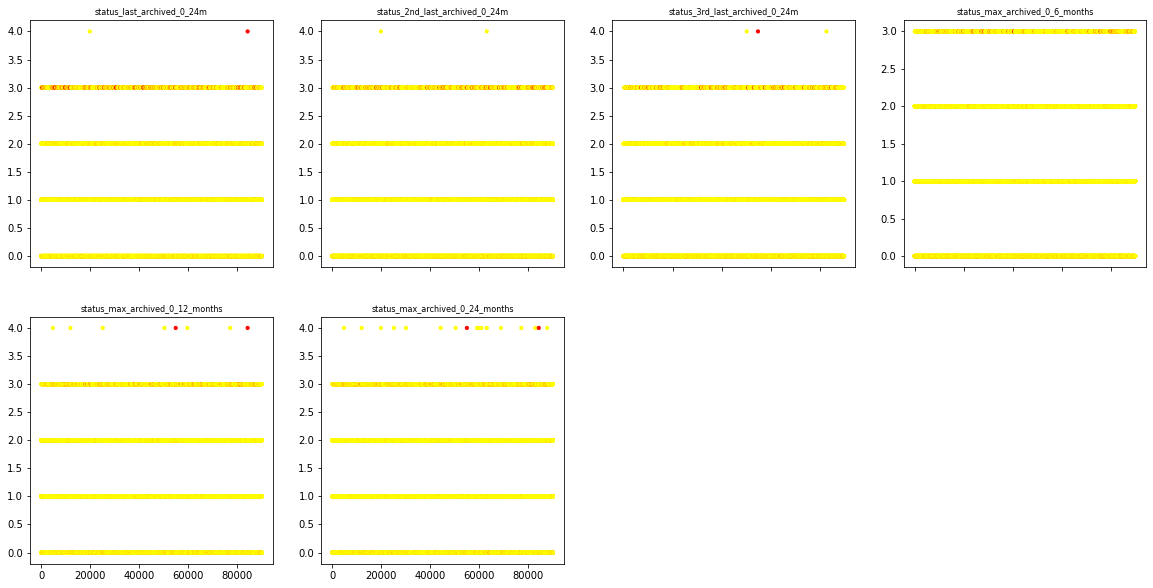

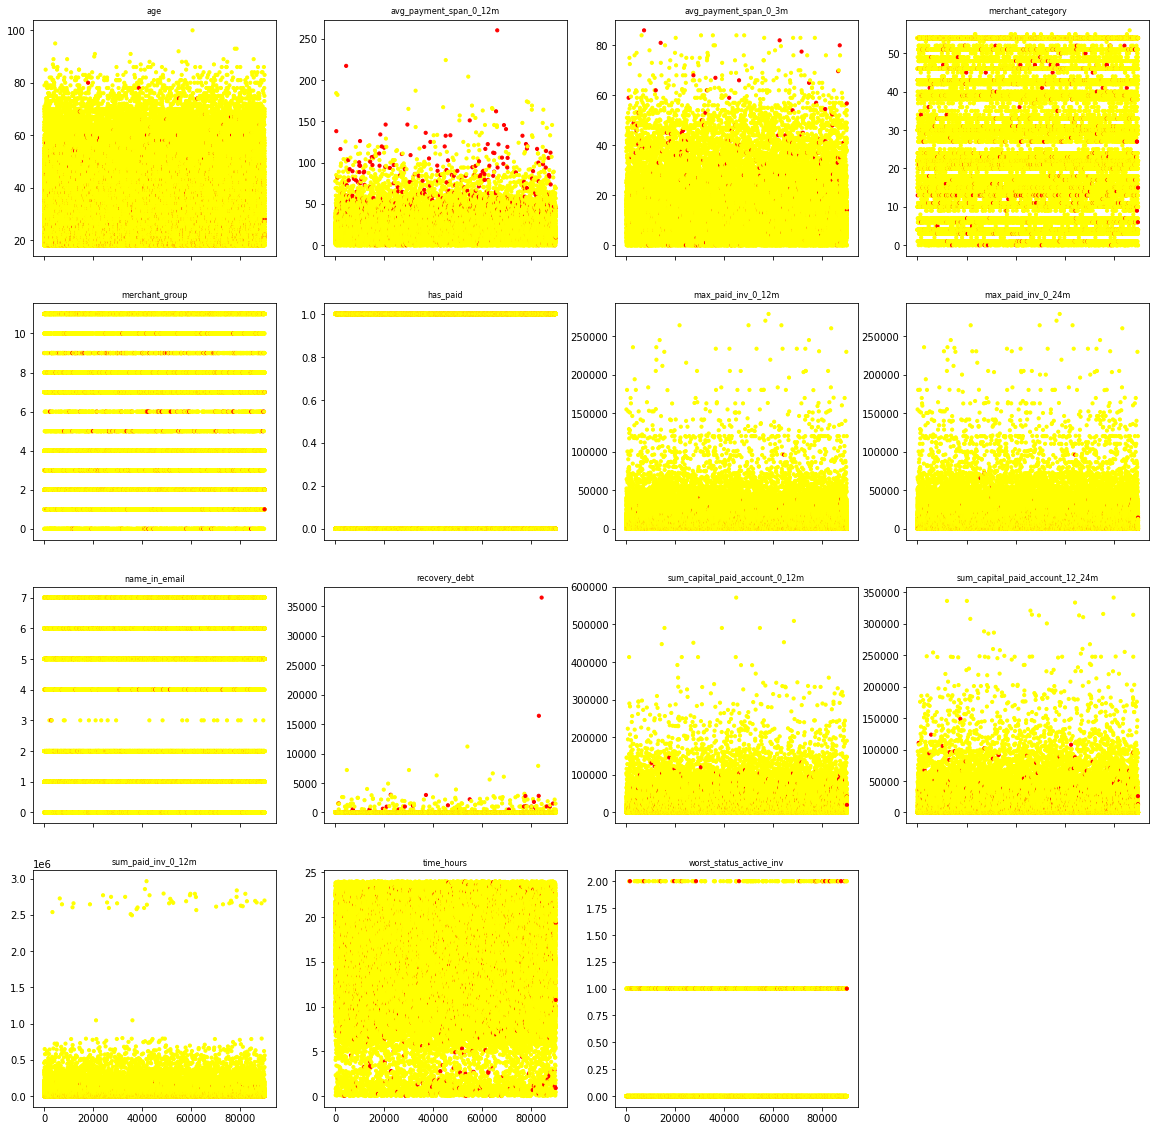

In [7]:
# Univariate plots conditioned on default status
for group, feats in groups.items():
    n = len(feats)
    rows = n % 4 or 1
    while rows * 4 < n:
        rows += 1
    fig, axes = plt.subplots(rows, 4, sharex=True, figsize=(20, rows * 5))
    axes = axes.ravel()
    for i, ax in enumerate(axes):
        try:
            feat = feats[i]
        except IndexError:
            fig.delaxes(ax)
            continue
        ax.scatter(x=df.index, y=df[feat], c=df.default, s=10, cmap=cmap, norm=norm)
        ax.set_title(feat, fontsize=8)

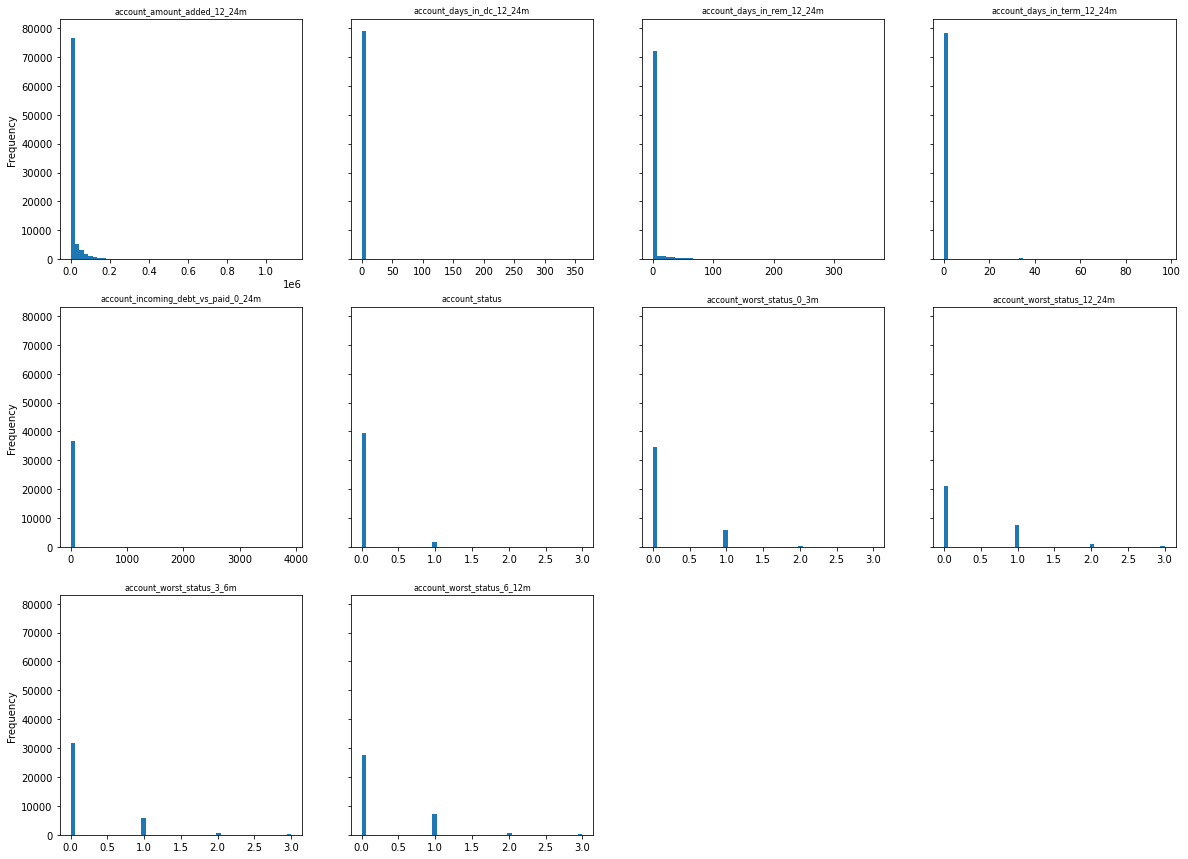

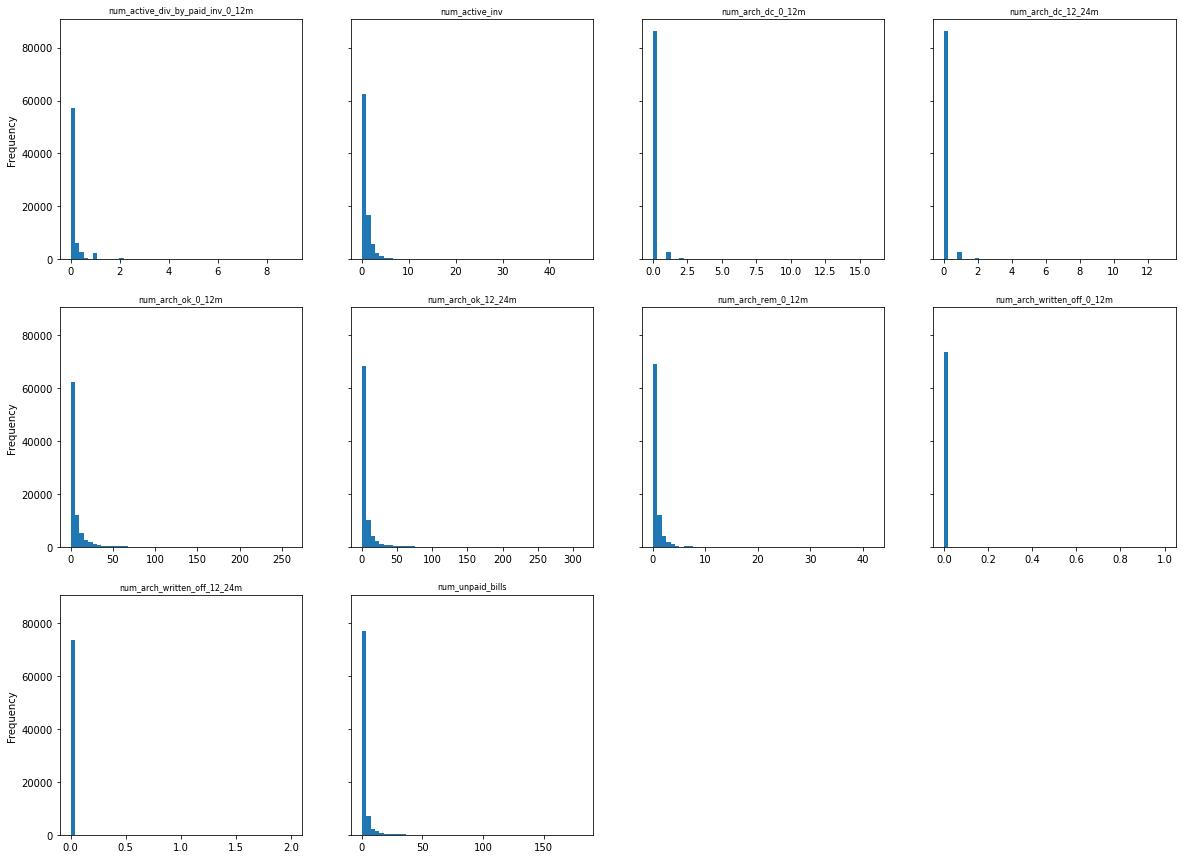

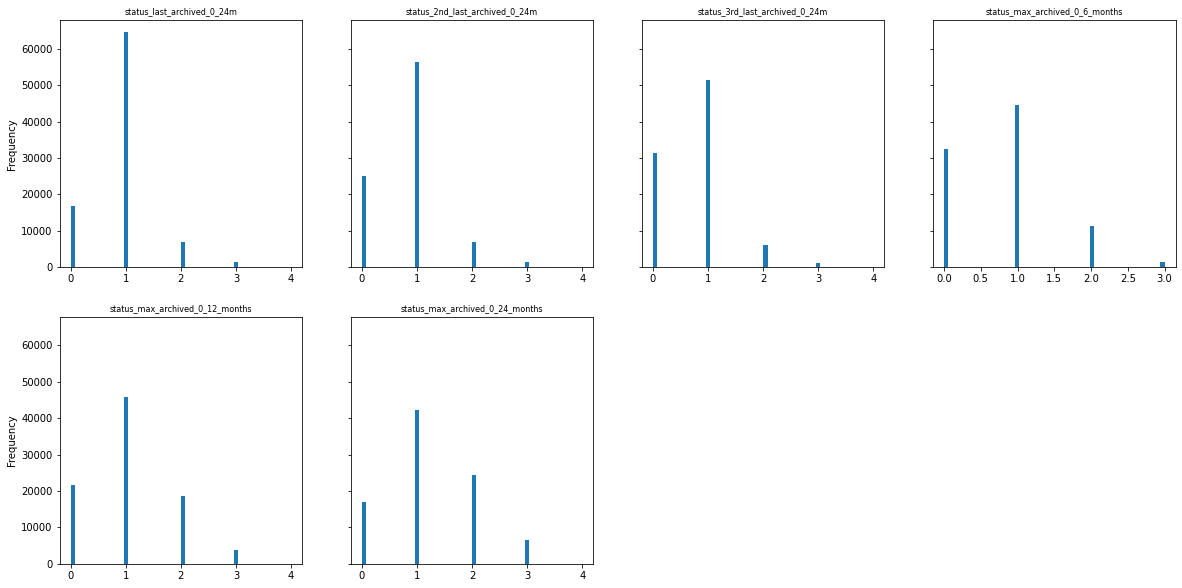

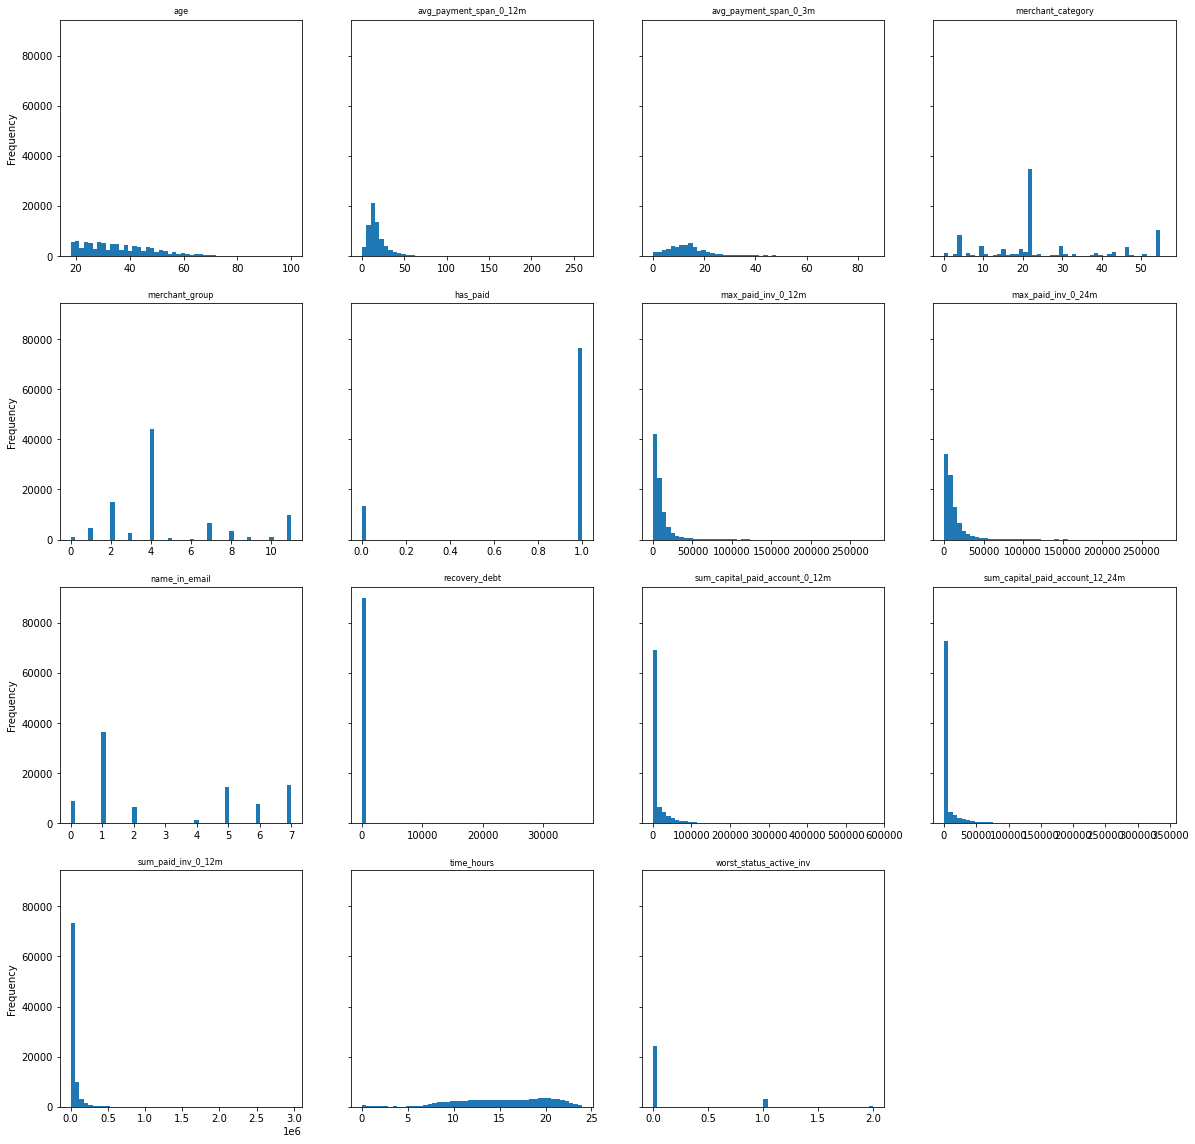

In [29]:
# Features distribution by group
for group, feats in groups.items():
    n = len(feats)
    rows = n % 4 or 1
    while rows * 4 < n:
        rows += 1
    fig, axes = plt.subplots(rows, 4, sharey=True, figsize=(20, rows * 5))
    axes = axes.ravel()
    for i, ax in enumerate(axes):
        try:
            feat = feats[i]
        except IndexError:
            fig.delaxes(ax)
            continue
        df[feat].plot(ax=ax, kind="hist", bins=50)
        ax.set_title(feat, fontsize=8)